# Algorytmy macierzowe - Algorytmy permutacji macierzy rzadkich
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz

1. Proszę wziąć macierz rzadką w formacie ze swojego zadania 4
2.
    1. Dla podmacierzy o rozmiarze <= 100 np. A[1:100][1:100] wierszy proszę
zbudować i narysować graf eliminacji G0
    2. Proszę uruchomić eliminację Gaussa na tym grafie G0 i narysowaćc nowe
krawędzie w G0
3. Proszę napisać i opisać kod wybranego algorytm permutacji macierzy
4. Proszę uruchomić macierz permutacji dla macierzy z punktu 2
5.
    1. Proszę narysować graf eliminacji G0’ dla spermutowanej małej macierz z
punktu 2
    2. Proszę uruchomić eliminację Gaussa na tym grafie G0’ i narysowaćc nowe
krawędzie w G0
6. Proszę uruchomić swój algorytm permutacji dla całej dużej (rozmiar > 100)
macierzy z zadania 4
7. Proszę porównać czasy rzadkiej eliminacji Gaussa przed permutacją i po
permutacji dla dużej macierzy (rozmiar > 100)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Ad. 1

W zaddaniu wykorzystaliśmy macierze z poprzedniego ćwiczenia.

In [2]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [3]:
A = get_matrix_from_csv("matrices/matrix_0_18_2_0.csv")

print(f"Rozmiar macierzy A: {A.shape}")
print(f"Liczba niezerowych elementów macierzy A: {np.count_nonzero(A)}")
print(f"Procent niezerowych pól macierzy A: {100*np.count_nonzero(A)/(A.shape[0])**2} %")

Rozmiar macierzy A: (400, 400)
Liczba niezerowych elementów macierzy A: 8836
Procent niezerowych pól macierzy A: 5.5225 %


In [4]:
def spy(matrix):
    mask = matrix == 0
    if matrix.shape[1] == 1:
        plt.plot(mask)
        plt.set_xticklabels(['', '0', '', '', '', '1'])
        plt.matshow(mask, aspect=0.001)
    else:
        plt.matshow(mask, aspect='auto')

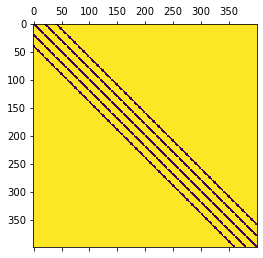

In [5]:
spy(A)

### Ad. 2a

Parametrem SIZE regulujemy rozmar podmacierzy

In [72]:
SIZE = 100 #to trzeba zmniejszyc jakos do ~12, zeby na rysunkach bylo cokolwiek widac
sub_A = A[:SIZE, :SIZE]

In [73]:
def matrix_to_coordinates(A):
    x_coords, y_coords = A.nonzero()
    vals = A[x_coords, y_coords]
    return list(zip(vals, x_coords, y_coords))

In [74]:
sub_A_coord = matrix_to_coordinates(sub_A)
edges = [(edge[1], edge[2]) for edge in sub_A_coord]

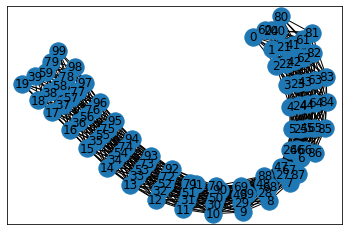

In [75]:
G = nx.Graph(edges)
nx.draw_networkx(G)

In [76]:
def coord_to_graph(edges, size):
    graph = {i: set() for i in range(size)}
    for vertex_1, vertex_2 in edges:
        graph[vertex_1].add(vertex_2)
        
    return graph

In [77]:
graph = coord_to_graph(edges, SIZE)

### Ad. 2b

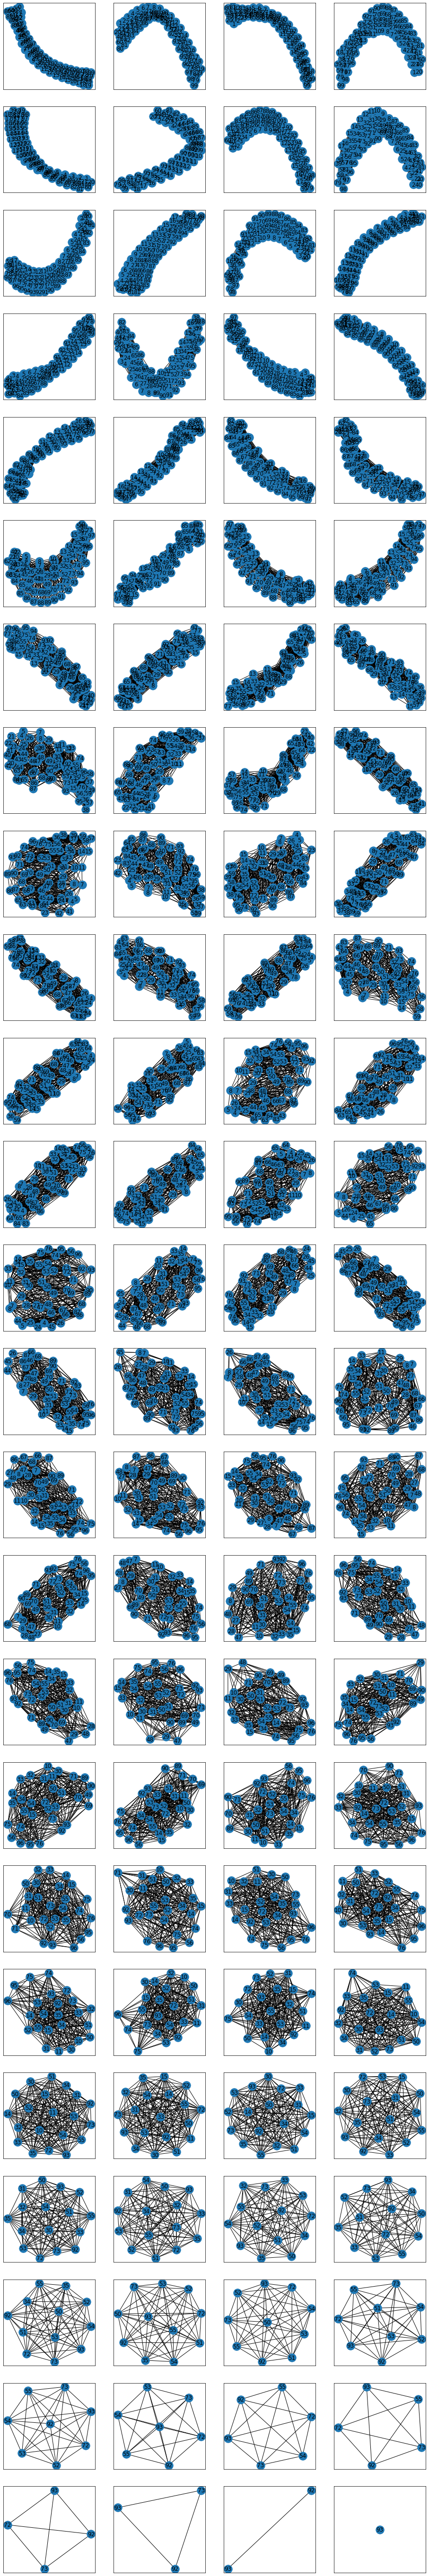

In [78]:
def G0_visualize(graph): 
    fig = plt.figure(figsize=(16, (SIZE//4+1)*4))    

    for i in range(len(graph)):
        G = nx.Graph()
        for v_1 in graph:
            for v_2 in graph[v_1]:
                G.add_edge(v_1, v_2)

        plt.subplot(SIZE//4+1, 4, i+1)
        nx.draw_networkx(G)
        
        p = min(graph.items(), key=lambda x: len(x[1]))[0]
        for v in graph[p]:
            graph[v] = (graph[v] | graph[p]) - {p}
        graph.pop(p)

G0_visualize(graph.copy())

In [81]:
def G0(graph):
        p = min(graph.items(), key=lambda x: len(x[1]))[0]
        for v in graph[p]:
            graph[v] = (graph[v] | graph[p]) - {p}
        graph.pop(p)

### Ad. 3

### Ad. 4

### Ad. 5a

In [82]:
G = nx.Graph(perm_edges)
nx.draw_networkx(G)

NameError: name 'perm_edges' is not defined

### Ad. 5b

In [83]:
G0_visualize(perm_graph.copy())

NameError: name 'perm_graph' is not defined

### Ad. 6

### Ad. 7

In [89]:
A_coord = matrix_to_coordinates(A)
edges = [(edge[1], edge[2]) for edge in A_coord]
graph = coord_to_graph(edges, 400)

In [90]:
from time import time

def log_time(func, arg, message):
    number_of_tests = 5
    exec_times = []
    arg_copy = arg.copy()
    for _ in range(number_of_tests):
        t1 = time()
        func(arg_copy)
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [91]:
G0_bef_perm = log_time(lambda graph: G0(graph), graph, "Czas eliminacji dla macierzy przed permutacją")
G0_aft_perm = log_time(lambda graph: G0(graph), graph_perm, "Czas eliminacji dla spermutowanej macierzy")

Czas eliminacji dla macierzy przed permutacją: 0.0002 [s]


NameError: name 'graph_perm' is not defined

In [ ]:
print('macierz A')
plt.bar(['przed permutacją', 'po permutacji'],
        [G0_bef_perm, G0_aft_perm])